# Gaussian Process

In [78]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline
np.random.seed(42)

In [79]:
#Gaussian Kernel but computationally expensive
#scale = 1, l= 1
def kernel(a,b):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a,b.T)
    return np.exp(-.5*sqdist)


In [1]:
# def kernelb(a,b):
#     return -0.5*()


In [81]:
n = 50
Xtest = np.linspace(-5,5,n).reshape(-1,1)
K_ = kernel(Xtest,Xtest)


In [82]:
L = np.linalg.cholesky(K_+1e-6*np.eye(n)) #note that we are adding gaussian noise to the K_


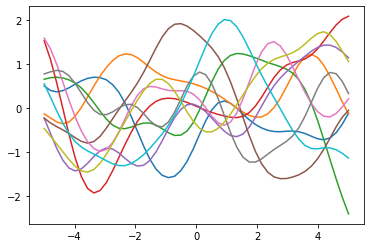

In [83]:
#draw prior sample from standard Normal distribution
sample = np.random.normal(size =(n,10))
f_prior = np.dot(L,sample)
plt.plot(Xtest,f_prior)
plt.show()


In [84]:
# This is the true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()

In [85]:

# Define the kernel
def kernel(a, b):
    """ GP squared exponential kernel """
    kernelParameter = 0.1
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/kernelParameter) * sqdist)


In [86]:

N = 10         # number of training points.
n = 50         # number of test points.
s = 0.00005    # noise variance.

# Sample some input points and noisy versions of the function evaluated at
# these points.

X = np.random.uniform(-5, 5, size=(N,1))
y = f(X) + s*np.random.randn(N)

K = kernel(X, X)
L = np.linalg.cholesky(K + s*np.eye(N))

# points we're going to make predictions at.
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X, Xtest))
mu = np.dot(Lk.T, np.linalg.solve(L, y))
# print(mu.shape)

# compute the variance at our test points.
K_ = kernel(Xtest, Xtest)
print(K_)

s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)



[[1.00000000e+000 8.12006800e-001 4.34749074e-001 ... 1.64931306e-200
  4.22154484e-209 7.12457641e-218]
 [8.12006800e-001 1.00000000e+000 8.12006800e-001 ... 4.24868097e-192
  1.64931306e-200 4.22154484e-209]
 [4.34749074e-001 8.12006800e-001 1.00000000e+000 ... 7.21646448e-184
  4.24868097e-192 1.64931306e-200]
 ...
 [1.64931306e-200 4.24868097e-192 7.21646448e-184 ... 1.00000000e+000
  8.12006800e-001 4.34749074e-001]
 [4.22154484e-209 1.64931306e-200 4.24868097e-192 ... 8.12006800e-001
  1.00000000e+000 8.12006800e-001]
 [7.12457641e-218 4.22154484e-209 1.64931306e-200 ... 4.34749074e-001
  8.12006800e-001 1.00000000e+000]]


(-5.0, 5.0, -3.0, 3.0)

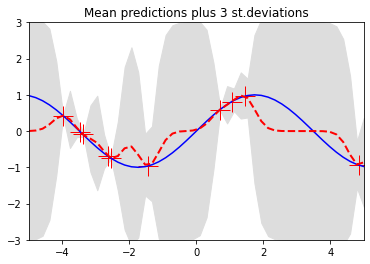

In [87]:
# PLOTS:
pl.figure(1)
pl.clf()
pl.plot(X, y, 'r+', ms=20)
pl.plot(Xtest, f(Xtest), 'b-')
pl.gca().fill_between(Xtest.flat, mu-3*s, mu+3*s, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.savefig('predictive.png', bbox_inches='tight')
pl.title('Mean predictions plus 3 st.deviations')
pl.axis([-5, 5, -3, 3])


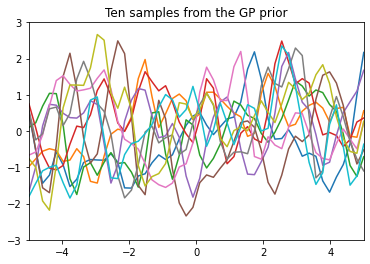

In [88]:
# draw samples from the prior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n))
f_prior = np.dot(L, np.random.normal(size=(n,10)))
pl.figure(2)
pl.clf()
pl.plot(Xtest, f_prior)
pl.title('Ten samples from the GP prior')
pl.axis([-5, 5, -3, 3])
pl.savefig('prior.png', bbox_inches='tight')



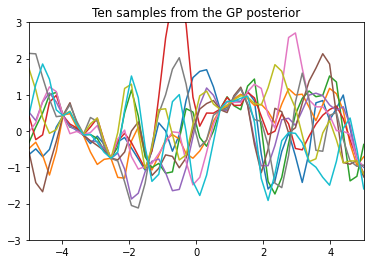

In [89]:
# draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,10)))
pl.figure(3)
pl.clf()
pl.plot(Xtest, f_post)
pl.title('Ten samples from the GP posterior')
pl.axis([-5, 5, -3, 3])
pl.savefig('post.png', bbox_inches='tight')
pl.show()